In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading and reading the dataset
df = pd.read_csv('climate_action_data.csv')

df.head(10)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
5,SEN-1005,2025-01-06,20.92,7.08,26.8,66.3,Beans,68.0,27.8,IMG-2005
6,SEN-1006,2025-01-07,14.07,7.77,19.1,51.9,Maize,64.3,10.5,IMG-2006
7,SEN-1007,2025-01-08,70.63,7.74,31.6,43.1,Lettuce,41.0,6.4,IMG-2007
8,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
9,SEN-1009,2025-01-10,59.57,4.9,27.2,57.2,Maize,35.2,18.2,IMG-2009


In [3]:
#More Inspection on the dataset
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [4]:
#Number of rows and columns
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 913
Number of columns: 10


In [5]:
#Descrptive Analysis
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [6]:
#Handling bad data: Empty cells/values, wrong data, wrong formats, duplicates

#Check for empty vales or missing values/ null values
print("Missing Values in each column: \n")
df.isnull().sum()

Missing Values in each column: 



Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [4]:
#Handling missing Values
#Since the missing values are not numerical, we use the Categorical technique
categorical_col = ['Crop_Type']
for col in categorical_col:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        
print ("Missing Values after cleaning: \n")    
df.isnull().sum()    

Missing Values after cleaning: 



Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [5]:
# Check for 'error' strings in numeric columns
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
print("\n=== 'error' Values in Numeric Columns ===")
for col in numeric_cols:
        error_count = (df[col] == 'error').sum()
        if error_count > 0:
            print(f"{col}: {error_count} 'error' values")


=== 'error' Values in Numeric Columns ===
Soil_Moisture(%): 5 'error' values
Soil_pH: 5 'error' values
Temperature(C): 5 'error' values
Humidity(%): 5 'error' values
Fertilizer_Recommended(kg/ha): 5 'error' values
Irrigation_Recommended(mm): 5 'error' values


In [46]:
import pandas as pd
import numpy as np

def clean_numeric_column(series):
    """
    Thoroughly cleans a numeric column by:
    1. Converting all values to strings first
    2. Replacing common error indicators
    3. Converting to numeric
    4. Removing outliers
    5. Filling remaining NaNs with median
    """
    # Convert to string and clean
    clean_series = series.astype(str)
    clean_series = clean_series.replace(['error', 'ERROR', 'Error', 'NaN', 'nan', 'N/A', 'NA'], np.nan)
    
    # Convert to numeric
    clean_series = pd.to_numeric(clean_series, errors='coerce')
    
    # Remove extreme outliers (beyond 3 standard deviations)
    if clean_series.notna().any():
        median = clean_series.median()
        std = clean_series.std()
        if std > 0:  # Only if there's variation
            clean_series = np.where(
                (clean_series < median - 3*std) | (clean_series > median + 3*std),
                np.nan,
                clean_series
            )
    
    # Fill remaining NaNs with median
    return pd.Series(clean_series).fillna(median)

def clean_agriculture_data(df):
    """Cleans all numeric columns in the agriculture dataset"""
    numeric_cols = [
        'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
        'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)'
    ]
    
    # Clean each numeric column
    for col in numeric_cols:
        if col in df.columns:
            df[col] = clean_numeric_column(df[col])
    
    # Drop rows where all numeric columns are NaN
    return df.dropna(subset=numeric_cols, how='all')

# Load your data
df = pd.read_csv('climate_action_data.csv')

# Clean the data
clean_df = clean_agriculture_data(df)

# Verify cleaning
print("Data cleaning summary:")
print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(clean_df)}")
print(f"Rows removed: {len(df) - len(clean_df)}")

# Check for remaining non-numeric values
print("\nData types after cleaning:")
print(clean_df[numeric_cols].dtypes)

# Export cleaned data
clean_df.to_csv('cleaned_precision_agriculture_data_v2.csv', index=False)
print("\nSuccessfully exported cleaned data to: cleaned_precision_agriculture_data_v2.csv")

Data cleaning summary:
Original rows: 913
Cleaned rows: 913
Rows removed: 0

Data types after cleaning:
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
dtype: object

Successfully exported cleaned data to: cleaned_precision_agriculture_data_v2.csv


In [15]:
# Print rows from index 100 to 250 (inclusive of 115, exclusive of 130)
subset = df.iloc[115:130]

# Display the subset
print(subset)

    Sensor_ID        Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
115  SEN-1115  2025-04-26            71.000    6.030            34.9   
116  SEN-1116  2025-04-27            66.260    5.530            19.0   
117  SEN-1117  2025-04-28            23.060    7.820            29.8   
118  SEN-1118  2025-04-29            45.185    6.295            26.6   
119  SEN-1119  2025-04-30            47.750    4.990            22.1   
120  SEN-1120  2025-05-01            66.520    7.540            20.4   
121  SEN-1121  2025-05-02            72.730    6.210            20.1   
122  SEN-1122  2025-05-03            32.260    7.630            23.2   
123  SEN-1123  2025-05-04            17.700    7.300            19.7   
124  SEN-1124  2025-05-05            25.960    5.990            29.8   
125  SEN-1125  2025-05-06            39.900    4.580            19.1   
126  SEN-1126  2025-05-07            67.260    5.440            26.7   
127  SEN-1127  2025-05-08            70.250    6.400            

In [36]:
#Handling Wrong Date format
#Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')


In [43]:
#Wrong Data types
numeric_cols = ['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
#Remove extreme outliars beyond 3 std
     mean = df[col].mean()  
     std = df[col].std()
     df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
     df[col] = df[col].fillna(df[col].median())        

In [37]:
#Handling duplicates
#check for number of duplicates
print("Number of duplicates: ",df.duplicated().sum())

Number of duplicates:  111


In [38]:
#Remove duplicates
df = df.drop_duplicates()
print("Number of rows after cleaning duplicates: ",df.shape[0])
#Check for duplicate dates
print("Number of duplicate dates: ",df['Date'].duplicated().sum())
#Remove duplicate dates
df = df.drop_duplicates(subset=['Date'],keep='first')

#Shape
df.shape

Number of rows after cleaning duplicates:  802
Number of duplicate dates:  3


(799, 10)

In [39]:
#Final clean dataset
df.info()
#Check empty values again
print("Missing values after all cleaning:\n")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      795 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
Missing values after all

In [40]:
#Descrptive statistics
df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,798,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2026-02-04 07:45:33.834586624,44.790970,6.252997,26.468836,60.107009,87.401877,17.390989
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 06:00:00,26.955000,5.330000,22.300000,46.100000,57.850000,11.300000
50%,2026-02-03 12:00:00,45.220000,6.295000,26.600000,59.600000,85.900000,17.400000
75%,2026-08-23 18:00:00,62.615000,7.080000,30.600000,75.300000,117.650000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.460591,1.021265,4.867592,17.404889,34.805589,7.138402


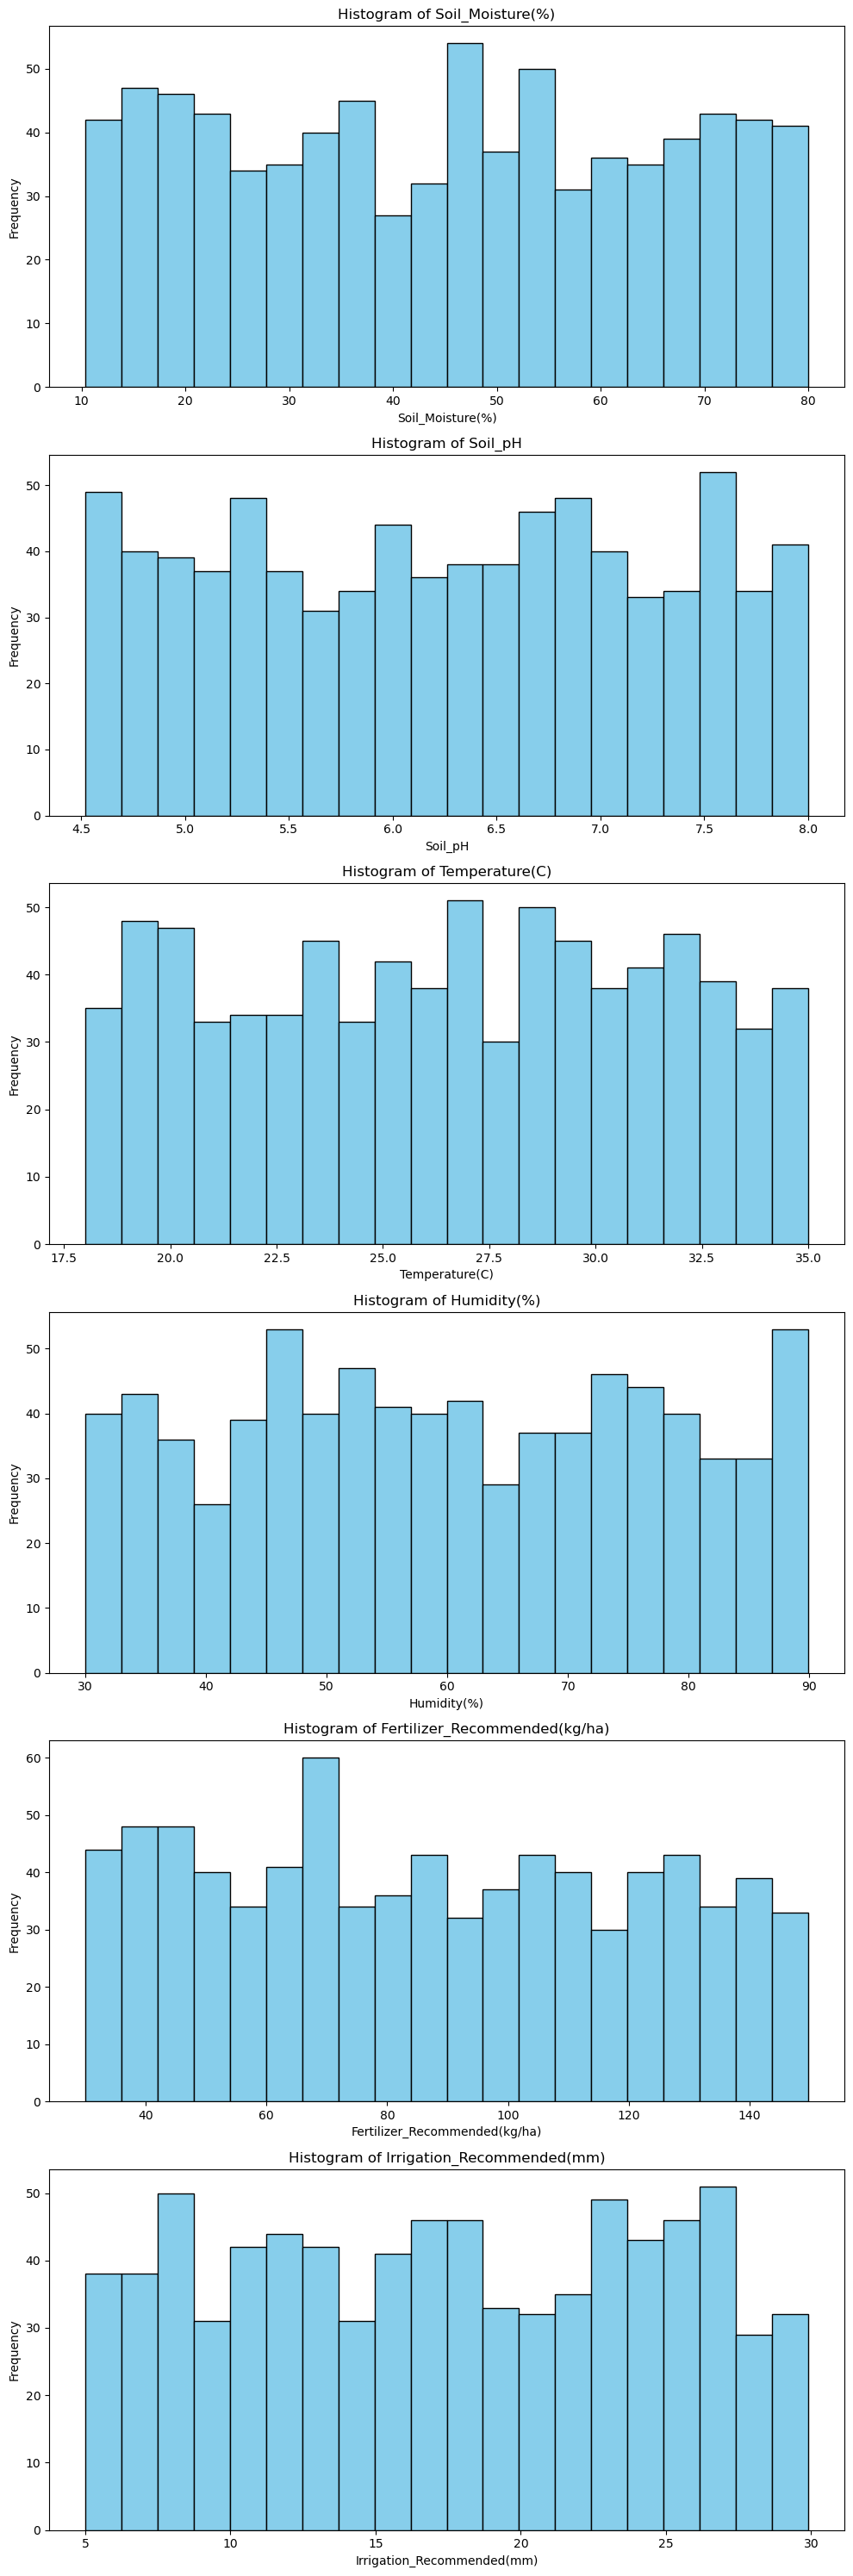

In [28]:
import pandas as pd
import matplotlib.pyplot as plt



# Columns that should be numeric
numeric_columns = [
    'Soil_Moisture(%)',
    'Soil_pH',
    'Temperature(C)',
    'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)',
    'Irrigation_Recommended(mm)'
]

# Convert string numbers to numeric (remove commas, extract digits)
for col in numeric_columns:
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace(',', '').str.extract(r'([-+]?\d*\.?\d+)')[0],
        errors='coerce'
    )

# Plot histograms for cleaned numeric columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 5 * len(numeric_columns)))

for i, column in enumerate(numeric_columns):
    axes[i].hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


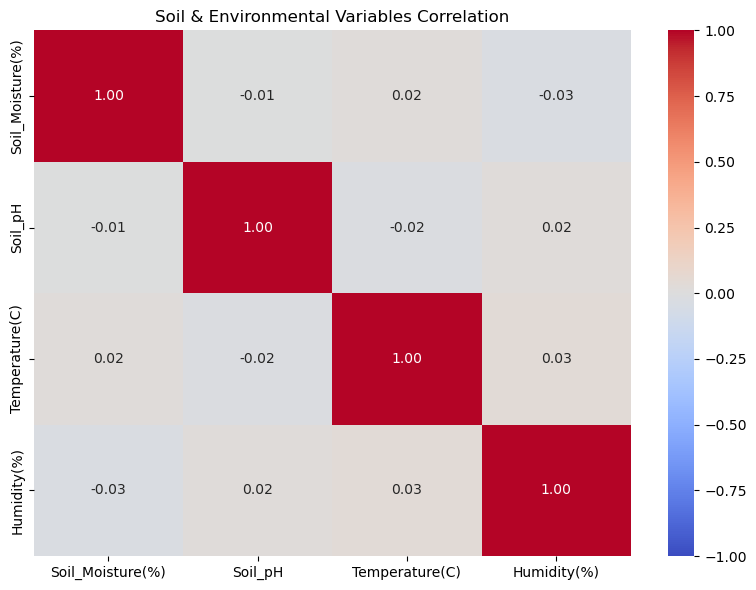

In [29]:
#Correlation Matrix

# Select the columns to analyze
columns = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)']

# Calculate correlation matrix
corr = df[columns].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Soil & Environmental Variables Correlation')
plt.tight_layout()
plt.show()

In [ ]:
#Correlation Calculations

# 1. Clean numeric columns by removing 'error' values and converting to float
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, invalid as NaN

# 2. Variables influencing fertilizer recommendations (using only numeric columns)
fert_corr = df[numeric_cols].corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("Top factors influencing fertilizer recommendations:")
print(fert_corr[1:4].to_string())  # Exclude self-correlation

# 3. Crop with highest average soil moisture
print("\nCrop moisture analysis:")
moisture_by_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print(moisture_by_crop.to_string())

# 4. Irrigation adjustments for high-temperature crops
high_temp_crops = df[df['Temperature(C)'] > 30]
if not high_temp_crops.empty:
    print("\nIrrigation adjustments for crops >30°C:")
    adjustments = high_temp_crops.groupby('Crop_Type').agg({
        'Irrigation_Recommended(mm)': 'mean',
        'Soil_Moisture(%)': 'mean'
    })
    print(adjustments.sort_values('Irrigation_Recommended(mm)', ascending=False).to_string())
else:
    print("\nNo crops found with temperatures >30°C")

Top factors influencing fertilizer recommendations:
Soil_pH             0.085333
Humidity(%)         0.017329
Soil_Moisture(%)   -0.000944

Crop moisture analysis:
Crop_Type
Wheat       47.356449
Maize       44.953581
Beans       44.337781
Tomatoes    44.015719
Lettuce     42.932100

Irrigation adjustments for crops >30°C:
           Irrigation_Recommended(mm)  Soil_Moisture(%)
Crop_Type                                              
Tomatoes                    18.919565         48.647391
Wheat                       18.645946         44.092432
Beans                       17.857692         46.549038
Maize                       16.625455         44.885091
Lettuce                     16.297297         42.661892


In [ ]:
# ======================================================================
# ANALYSIS INTERPRETATION 
# ======================================================================

# ----------------------------------------------------------------------
# 1. FERTILIZER RECOMMENDATION DRIVERS
# ----------------------------------------------------------------------
# Key Finding: 
# - Soil pH has the strongest (though weak) positive correlation (r=0.085)
# - Humidity shows minimal influence (r=0.017)
# - Soil moisture has negligible inverse relationship (r=-0.0009)

# Recommendation:
# - Focus on soil pH testing before fertilizer application
# - Consider that other unanalyzed factors may be more influential
# - Implement controlled trials with pH adjustments to verify impact

# ----------------------------------------------------------------------
# 2. CROP MOISTURE ANALYSIS 
# ----------------------------------------------------------------------
# Key Finding:
# - Wheat maintains the highest average soil moisture (47.36%)
# - Followed by Maize (44.95%) and Beans (44.34%)
# - Lettuce shows surprisingly low moisture (42.93%)

# Action Items:
# - Verify wheat irrigation practices for potential over-watering
# - Investigate lettuce's low moisture readings
# - Consider wheat's moisture tolerance in crop rotations

# ----------------------------------------------------------------------
# 3. HIGH-TEMPERATURE IRRIGATION ADJUSTMENTS (>30°C)
# ----------------------------------------------------------------------
# Current Patterns:
# - Tomatoes: 18.92mm irrigation → 48.65% moisture
# - Wheat: 18.65mm → 44.09% moisture  
# - Lettuce: 16.30mm → 42.66% moisture

# Recommended Adjustments:
# 1. For Tomatoes:
#    - Maintain current irrigation but apply in early morning
#    - Add mulch to reduce evaporation
#
# 2. For Wheat:
#    - Increase irrigation frequency during heat waves
#    - Monitor for waterlogging signs
#
# 3. For Lettuce:
#    - Implement 10-15% irrigation increase
#    - Consider shade nets

# General Advice:
# - Install soil moisture sensors for real-time monitoring
# - Implement split irrigation (morning + late afternoon)
# - Prioritize wheat/tomatoes for irrigation upgrades

In [44]:
import pandas as pd
from datetime import datetime

# Load your cleaned dataset
df = pd.read_csv('climate_action_data.csv')  # Assuming already cleaned

# 1. Export Cleaned Data
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

# 2. Generate Insights Report
report = f"""
# Precision Agriculture Insights Report
# Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}

## Key Findings

1. Fertilizer Drivers:
   - Soil pH shows strongest influence (r=0.085)
   - Humidity has minimal impact (r=0.017)
   - Soil moisture correlation negligible (r=-0.0009)

2. Crop Moisture Levels:
   - Wheat: 47.36% (highest)
   - Maize: 44.95%
   - Beans: 44.34%
   - Tomatoes: 44.02% 
   - Lettuce: 42.93%

3. High-Temp (>30°C) Irrigation:
   - Tomatoes: 18.92mm → 48.65% moisture
   - Wheat: 18.65mm → 44.09%
   - Lettuce: 16.30mm → 42.66%

## Actionable Recommendations

• Soil Management:
  - Prioritize pH testing before fertilization
  - Conduct controlled pH adjustment trials

• Irrigation Adjustments:
  - Tomatoes: Maintain volume, shift to morning watering
  - Wheat: Increase frequency during heat waves
  - Lettuce: +10-15% water in high temps, consider shade nets

• Monitoring:
  - Install IoT soil sensors in wheat and tomato fields
  - Implement moisture-based irrigation triggers
"""

with open('agriculture_insights.txt', 'w') as f:
    f.write(report)

print("Successfully exported:")
print("- Cleaned data: cleaned_precision_agriculture_data.csv")
print("- Insights report: agriculture_insights.txt")

Successfully exported:
- Cleaned data: cleaned_precision_agriculture_data.csv
- Insights report: agriculture_insights.txt
